# Phase One Project UPDATE

### Where to open a new flower shop... in Silver Spring, Maryland or Leesburg, Virginia?

## Imports

In [36]:
import requests
import json
import pandas as pd
import numpy as np
import os


## Yelp API Call

In [6]:
with open('api_key.txt') as f:
    lines = f.read()
 #   print(lines)

In [7]:
url = 'https://api.yelp.com/v3/businesses/search'
key = lines
headers = {
    'Authorization': 'Bearer %s' % key
}

In [8]:
data = []
for offset in range(0, 1000, 50):
    url_params = {
        'term': "flower",
        'location': 'Silver Spring+MD',
        'limit': 50,
        'offset': offset,
        "radius": 8047
    }

    response = requests.get(url, headers=headers, params=url_params)
    if response.status_code == 200:
        data += response.json()['businesses']

    elif response.status_code == 400:
            print('400 Bad Request')
            break


In [9]:
data2 = []
for offset in range(0, 1000, 50):
    url_params = {
        'term': "flower",
        'location': 'Leesburg+VA',
        'limit': 50,
        'offset': offset,
        "radius": 8047
    }

    response = requests.get(url, headers=headers, params=url_params)
    if response.status_code == 200:
        data2 += response.json()['businesses']

    elif response.status_code == 400:
            print('400 Bad Request')
            break


## Clean Yelp Results

In [10]:
def getbiz(params):
    names = []
    ratings = []
    pricing = []
    cnt = []
    address = []
    is_closed = []
    review_count = []
    categories = []
    city = []
    distance = []
    longitude = []
    latitude = []

    for i in range(len(params)):
        names.append(params[i]['name'])
        ratings.append(params[i]['rating'])
        address.append((params[i]['location']['address1']))
        is_closed.append(params[i]['is_closed'])
        review_count.append(params[i]['review_count'])
        categories.append(params[i]['categories'])
        city.append(params[i]['location']['city'])
        distance.append(params[i]['distance'])
        longitude.append(params[i]['coordinates']['longitude'])
        latitude.append(params[i]['coordinates']['latitude'])
        try:
            [pricing.append(len(params[i]['price']))]
        except:
            pricing.append(None)
        cnt.append(params[i]['review_count'])
    biz = {'name': names, 'rating': ratings, 'pricing': pricing, 'num_reviews': cnt, 'street_address': address, 
            'is_closed': is_closed, 'review_count': review_count, 'categories': categories, 'city': city,
            'distance': distance, 'longitude': longitude, 'latitude': latitude}


    return pd.DataFrame(biz)

In [11]:
ssdf = getbiz(data)
lbdf = getbiz(data2)

In [12]:
# Delete shops that are not within the respective cities
ssdf = ssdf[ssdf.city == 'Silver Spring']
lbdf = lbdf[lbdf.city == 'Leesburg']

In [13]:
ssdf.reset_index(inplace = True)
ssdf.drop('index', 1, inplace= True)

In [14]:
lbdf.reset_index(inplace = True)
lbdf.drop('index', 1, inplace= True)

In [15]:
#Save cleaned data to CSV
ssdf.to_csv('silver_spring.csv', encoding='utf-8', index=False)

lbdf.to_csv('leesburg.csv', encoding='utf-8', index=False)

In [16]:
def find_alias(params):
    alias = []
    for i in range(len(params)):
        alias.append(params['categories'][i][0]['alias'])
       # if params['categories'][i][0]['alias'] == '':
        #    df.drop(params['categories'][i])
    params['alias'] = alias

In [17]:
find_alias(ssdf)

In [28]:
find_alias(lbdf)

In [18]:
#Find and destroy empty category
lbdf = lbdf.dropna(subset=['categories'])

In [19]:
#Find and destroy empty list
lbdf = lbdf[lbdf['categories'].map(lambda d: len(d)) > 0]

In [20]:
#FIND OUT HOW TO KEEP MULTI PURPOSE STORES (SECOND ALIAS)

In [29]:
#Function to filter non-flowershops
def flower_filter(params):
    indexNames = params[(params['alias'] != 'florists') & (params['alias'] != 'floraldesigners') ].index
    params.drop(indexNames, inplace=True)
    return params

In [30]:
lbdf = flower_filter(lbdf)
ssdf = flower_filter(ssdf)

In [31]:
ssdf

,name,rating,pricing,num_reviews,street_address,is_closed,review_count,categories,city,distance,longitude,latitude,alias
0,"Bell Flowers, Inc.",5.0,2.0,71,8947 Brookville Rd,False,71,"[{'alias': 'florists', 'title': 'Florists'}]",Silver Spring,2972.202721,-77.052067,39.003009,florists
1,Danisa's Wholesale Fresh Flowers Inc,4.5,2.0,28,8870 Monard Dr,False,28,"[{'alias': 'florists', 'title': 'Florists'}]",Silver Spring,3567.895819,-77.059157,39.001541,florists
2,Potomac Floral Wholesale,3.5,2.0,76,2403 Linden Ln,False,76,"[{'alias': 'florists', 'title': 'Florists'}, {...",Silver Spring,3155.302144,-77.050338,39.009649,florists
4,Garden Vivien,5.0,NaN,2,2223 Kansas Ave,False,2,"[{'alias': 'florists', 'title': 'Florists'}]",Silver Spring,2721.772142,-77.049093,39.003290,florists
5,Da Vinci's Florist,4.0,2.0,37,2756 Garfield Ave,False,37,"[{'alias': 'florists', 'title': 'Florists'}, {...",Silver Spring,3451.436878,-77.057779,39.001881,florists
6,Creative Floral Designs,3.5,2.0,26,12158 Tech Rd,False,26,"[{'alias': 'florists', 'title': 'Florists'}, {...",Silver Spring,7528.587951,-76.967169,39.054732,florists
8,Ella's Florals,5.0,NaN,4,None,False,4,"[{'alias': 'florists', 'title': 'Florists'}]",Silver Spring,5007.226265,-77.028870,38.996680,florists
9,Roxana Multiservices,3.0,NaN,6,8727 Flower Ave,False,6,"[{'alias': 'floraldesigners', 'title': 'Floral...",Silver Spring,1238.291097,-77.003873,38.999579,floraldesigners
10,Citiflowers,2.5,NaN,11,2321 Stewart Ave,False,11,"[{'alias': 'florists', 'title': 'Florists'}, {...",Silver Spring,2826.536441,-77.050319,39.002958,florists
13,Sweet Stems Floral,5.0,NaN,2,3020 Beethoven Way,False,2,"[{'alias': 'floraldesigners', 'title': 'Floral...",Silver Spring,9928.829936,-76.945920,39.069223,floraldesigners


In [32]:
lbdf

,name,rating,pricing,num_reviews,street_address,is_closed,review_count,categories,city,distance,longitude,latitude,alias
0,Loudoun D Floral,4.5,2.0,16,,False,16,"[{'alias': 'florists', 'title': 'Florists'}]",Leesburg,1491.759497,-77.534730,39.130220,florists
1,J Morris Flowers,4.0,3.0,27,120 East Market St,False,27,"[{'alias': 'florists', 'title': 'Florists'}]",Leesburg,1314.094845,-77.561445,39.114299,florists
2,CPK Floral Designs,5.0,NaN,12,None,False,12,"[{'alias': 'florists', 'title': 'Florists'}, {...",Leesburg,1491.759497,-77.531944,39.119907,florists
3,Jerry's Flowers & Gifts,4.0,2.0,22,700 Fieldstone Dr NE,False,22,"[{'alias': 'florists', 'title': 'Florists'}]",Leesburg,1147.831498,-77.545801,39.125919,florists
4,Springvale Floral,5.0,NaN,4,None,False,4,"[{'alias': 'floraldesigners', 'title': 'Floral...",Leesburg,1491.759497,-77.569520,39.112050,floraldesigners
5,House Of Redman,5.0,NaN,1,206 Loudoun St SW,False,1,"[{'alias': 'florists', 'title': 'Florists'}, {...",Leesburg,1858.989002,-77.567840,39.115130,florists
6,Holly Heider Chapple Flowers,4.0,NaN,3,None,False,3,"[{'alias': 'florists', 'title': 'Florists'}]",Leesburg,1491.759497,-77.566540,39.108480,florists
8,Wild Green Yonder,5.0,NaN,2,106 Loudoun St SW,False,2,"[{'alias': 'floraldesigners', 'title': 'Floral...",Leesburg,1773.476827,-77.566845,39.114899,floraldesigners
11,Affordable Arrangements,5.0,NaN,2,,False,2,"[{'alias': 'floraldesigners', 'title': 'Floral...",Leesburg,1491.759497,-77.569405,39.110386,floraldesigners


## Analysis

In [44]:
ssdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 13
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            10 non-null     object 
 1   rating          10 non-null     float64
 2   pricing         5 non-null      float64
 3   num_reviews     10 non-null     int64  
 4   street_address  9 non-null      object 
 5   is_closed       10 non-null     bool   
 6   review_count    10 non-null     int64  
 7   categories      10 non-null     object 
 8   city            10 non-null     object 
 9   distance        10 non-null     float64
 10  longitude       10 non-null     float64
 11  latitude        10 non-null     float64
 12  alias           10 non-null     object 
dtypes: bool(1), float64(5), int64(2), object(5)
memory usage: 1.0+ KB


In [45]:
lbdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 11
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            9 non-null      object 
 1   rating          9 non-null      float64
 2   pricing         3 non-null      float64
 3   num_reviews     9 non-null      int64  
 4   street_address  6 non-null      object 
 5   is_closed       9 non-null      bool   
 6   review_count    9 non-null      int64  
 7   categories      9 non-null      object 
 8   city            9 non-null      object 
 9   distance        9 non-null      float64
 10  longitude       9 non-null      float64
 11  latitude        9 non-null      float64
 12  alias           9 non-null      object 
dtypes: bool(1), float64(5), int64(2), object(5)
memory usage: 945.0+ bytes


AttributeError: module 'matplotlib' has no attribute 'title'

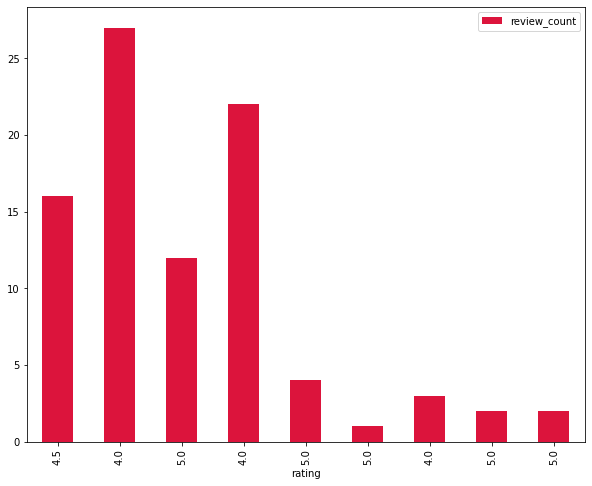

In [39]:
# Graph totals
lbdf.plot.bar("rating", "review_count", figsize = (10,8), color = "crimson") 
plt.title("Distribution of Yelp Ratings in Leesburg, VA")
plt.xlabel("Yelp Ratings")
plt.ylabel("Review Count")

AttributeError: module 'matplotlib' has no attribute 'title'

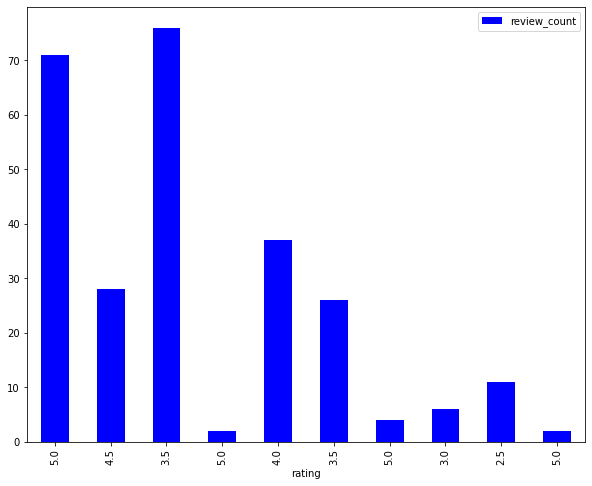

In [46]:
ssdf.plot.bar("rating", "review_count", figsize = (10,8), color = "blue") 
plt.title("Distribution of Yelp Ratings in Leesburg, VA")
plt.xlabel("Yelp Ratings")
plt.ylabel("Review Count")

In [57]:
# Retrieve population data from Census
census_ss = open('Census_SS.csv')
census_ss

<_io.TextIOWrapper name='Census_SS.csv' mode='r' encoding='cp1252'>

In [80]:
# Silver Spring population from US Census B.
ss_lst = open('Census_SS.csv').readlines()
ss_lst[4]

'"Population, Census, April 1, 2020","","81,015",""\n'

In [81]:
# Leesburg population from US Census B.
lb_lst = open('Census_LB.csv').readlines()
lb_lst[1]

'"Population estimates, July 1, 2019,  (V2019)","","53,727",""\n'

In [ ]:
# Flower shop per 1,000 people Silver Spring


In [ ]:
# Flower shop per 1,000 people Leesburg

In [82]:
# Average income from Silver Spring
ss_lst

['"Fact","Fact Note","Silver Spring CDP, Maryland","Value Note for Silver Spring CDP, Maryland"\n',
 '"Population estimates, July 1, 2019,  (V2019)","","X",""\n',
 '"Population estimates base, April 1, 2010,  (V2019)","","X",""\n',
 '"Population, percent change - April 1, 2010 (estimates base) to July 1, 2019,  (V2019)","","X",""\n',
 '"Population, Census, April 1, 2020","","81,015",""\n',
 '"Population, Census, April 1, 2010","","71,452",""\n',
 '"Persons under 5 years, percent","","8.0%",""\n',
 '"Persons under 18 years, percent","","22.4%",""\n',
 '"Persons 65 years and over, percent","","10.4%",""\n',
 '"Female persons, percent","","50.9%",""\n',
 '"White alone, percent","","39.9%",""\n',
 '"Black or African American alone, percent","(a)","28.4%",""\n',
 '"American Indian and Alaska Native alone, percent","(a)","0.3%",""\n',
 '"Asian alone, percent","(a)","7.4%",""\n',
 '"Native Hawaiian and Other Pacific Islander alone, percent","(a)","0.0%",""\n',
 '"Two or More Races, percent","

In [ ]:
# Average income from Leesburg

In [ ]:
# Average age from each city

In [ ]:
# Flower buyer demographic info?

## Maps

In [71]:
# Point maps for each city

In [ ]:
# Population heat map

In [ ]:
# Population head map plus point map (show who services who)

## Decision